In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [28]:
df = yf.download('EURUSD=X', start ='2008-10-9')['Adj Close'].to_frame()

[*********************100%%**********************]  1 of 1 completed


In [29]:
df.head()

,Adj Close
Date,
2008-10-09,1.359804
2008-10-10,1.339800
2008-10-13,1.362194
2008-10-14,1.361804
2008-10-15,1.344393


We use the logaritmic returns because it is easier to do the computation for returns on time periods. Thanks to the logarithm properties we can just sum the log return.

In [30]:
df['logRet'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

df.dropna(inplace=True)

(-0.04, 0.04)

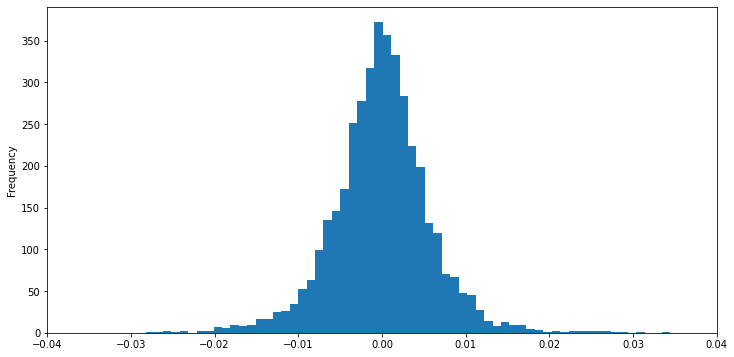

In [31]:
plt.figure(figsize=(12,6))
df.logRet.plot(kind='hist', bins=300)
plt.xlim(-0.04, 0.04)

To compute the total return for the whole period, we can just sum the log returns:

In [32]:
df.logRet.sum()

-0.23670363223213808

If we want to see the how much is worth now a dollar bought at the beginning of the period compared to a euro now, or we can see it as investing 1 EUR in USD at the beginning of the period  how much is worth it now:

$LR = log \frac{P_{end}}{P_{start}}$

We apply the exponent to both side:

$e^{LR} = \frac{P_{end}}{P_{start}}$

So we can write:

$P_{end} = P_{start} \times e^{LR}$

In [33]:
dollar_price_start = 1
dollar_value_now = np.exp(df.logRet.sum()) * dollar_price_start
dollar_value_now

0.789225154257998

If we want to compute the cumulative log return till a certain time $T$, we can use the pandas function *cumsum()* that does it for us:

In [34]:
df['cumLogRet'] = df.logRet.cumsum()

df.head(5)

,Adj Close,logRet,cumLogRet
Date,,,
2008-10-10,1.339800,-0.014820,-0.014820
2008-10-13,1.362194,0.016576,0.001756
2008-10-14,1.361804,-0.000286,0.001470
2008-10-15,1.344393,-0.012868,-0.011398
2008-10-16,1.349000,0.003421,-0.007977


Where we can see that:

$cumLogRet_T = \sum_{t=1}^{T} logRet_t = logRet_{T} + logRet_{T-1} + logRet_{T-2} + \ldots + logRet_{start}$.

If we want to see the value through time of 1 USD bought at the beginning, we can apply the formula we saw above:

In [36]:
df['value1USD'] = df.logRet.cumsum().apply(np.exp)

df.head()

,Adj Close,logRet,cumLogRet,value1USD
Date,,,,
2008-10-10,1.339800,-0.014820,-0.014820,0.985289
2008-10-13,1.362194,0.016576,0.001756,1.001757
2008-10-14,1.361804,-0.000286,0.001470,1.001471
2008-10-15,1.344393,-0.012868,-0.011398,0.988667
2008-10-16,1.349000,0.003421,-0.007977,0.992054


<Axes: xlabel='Date'>

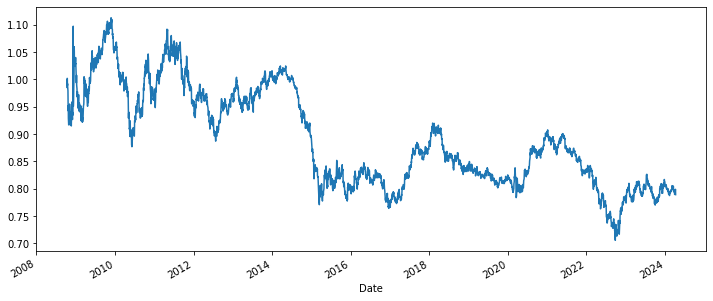

In [41]:
# Value of 1 USD compared to EUR
plt.figure(figsize=(12,5))
df.value1USD.plot()

# Performance metrics